<a href="https://colab.research.google.com/github/juandi247/Calculadora-de-integrales-y-area-bajo-la-curva/blob/main/Preprocesamiento_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


#graficar
import matplotlib.pyplot as plt

#sistema operativo
import os

#leer archivos de web
import urllib

In [6]:
urlvariables="https://raw.githubusercontent.com/adiacla/bigdata/master/variable.txt"
variables=urllib.request.urlopen("https://raw.githubusercontent.com/adiacla/bigdata/master/variable.txt")
for linea in variables:
  print(linea.decode("utf-8"))



price: precio de la vivienda.

lotSize: metros cuadrados de la vivienda.

age: antigüedad de la vivienda.

landValue: valor del terreno.

livingArea: metros cuadrados habitables.

pctCollege: porcentaje del vecindario con título universitario.

bedrooms: número de dormitorios.

firplaces: número de chimeneas.

bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).

rooms: número de habitaciones.

heating: tipo de calefacción.

fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).

sewer: tipo de desagüe.

waterfront: si la vivienda tiene vistas al lago.

newConstruction: si la vivienda es de nueva construcción.

centralAir: si la vivienda tiene aire acondicionado.

built date: fecha de contruida	

property code: número catastral	

mtrsmyroom: Area por salón	

category: Tipo de construcción



In [ ]:
url="https://raw.githubusercontent.com/adiacla/bigdata/master/casasOrg.csv"
df=pd.read_csv(url,sep=";")
#sep para separar por comas
df

In [10]:
df.head(20)

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,built date,property code,mtrsmyroom,category
0,132500,0.09,42,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,21/08/1978,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,0,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,10/08/2020,UC0101385720AWS27109,"4042,166667",Mx
2,109000,0.19,133,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,##############################################...,UC0101341673AWS22539,"1155,5",S
3,155000,0.41,13,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,14/08/2007,UC0101157062AWS32877,"4128,8",Mx
4,86060,0.11,0,15000,840.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,10/08/2020,UC0101533571AWS7743,5280,Mx
5,120000,0.68,31,14000,1152.0,22,4,1.0,1.0,8,hot air,gas,septic,No,No,No,18/08/1989,UC0101103438AWS70350,1894,S
6,153000,0.40,33,23300,2752.0,51,4,1.0,1.5,8,hot water/steam,oil,septic,No,No,No,19/08/1987,UC0101168218AWS98285,"3256,5",Mx
7,170000,1.21,23,14600,1662.0,35,4,1.0,1.5,9,hot air,oil,septic,No,No,No,16/08/1997,UC0101876532AWS73689,"1806,888889",S
8,90000,0.83,36000,22200,1632.0,51,3,NaN,1.5,8,electric,electric,septic,No,No,No,##############################################...,UC0101662465AWS28315,2979,S
9,122900,1.94,4,21200,1416.0,44,3,NaN,1.5,6,Hot Air,gas,none,No,No,No,11/08/2016,UC010184669AWS41205,"3769,333333",Mx


In [ ]:
df.age=df.age+3    #recorrer toda la matriz
df

In [25]:
df.columns=["precio","metros_totales", "antiguedad", "precio_terreno", "metros_habitables","universitarios",
            "dormitorios", "chimenea", "banyos", "habitaciones","calefaccion","consumo_calefacion",
            "desague", "vistas_lago", "nueva_construccion","aire_acondicionado","fecha construido","numero catastro","MetroPorSalon","categoria"]

In [76]:
dfc=df.copy()  #copia de trabajo, mientras que el otro df sera el original

In [77]:
dfc.drop("fecha construido",axis=1,inplace=True)  #para borrar la columna porque es la misma cosa que age tonces es innecesario tnerla en el dataframe
#axis 1 es igual a columnas
#axis 0 es igual a filas
#implace True es para hacer el cambio permantente y salga la columna borrada
dfc

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,numero catastro,MetroPorSalon,categoria
0,132500,0.09,45,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,3,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,UC0101385720AWS27109,"4042,166667",Mx
2,109000,0.19,136,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,UC0101341673AWS22539,"1155,5",S
3,155000,0.41,16,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,UC0101157062AWS32877,"4128,8",Mx
4,86060,0.11,3,15000,840.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,UC0101533571AWS7743,5280,Mx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,35,24200,2310.0,61,5,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,UC010164584AWS85226,2410,S
1724,285000,0.94,40,36200,2564.0,61,4,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,UC0101795774AWS37985,3524,Mx
1725,194900,0.39,12,20400,1099.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,No,No,UC0101854026AWS70632,"7166,333333",M
1726,125000,0.24,51,16800,1225.0,51,3,1.0,1.0,7,hot air,gas,public/commercial,No,No,No,UC0101693094AWS83998,2575,S


<Axes: ylabel='Frequency'>

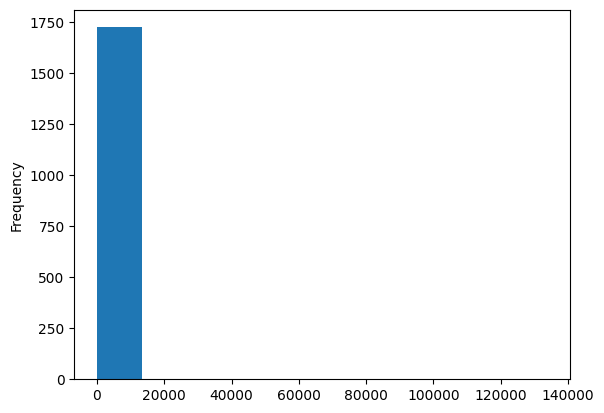

In [78]:
df.antiguedad.plot.hist() #graficar en un histograma

In [79]:
dfc[dfc["antiguedad"]>1000]   #filtro para encontrar los datos con antiguedad +1000 año

#dfc["antiguedad"]  es lo mismo que dfc.antiguedad

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,numero catastro,MetroPorSalon,categoria
8,90000,0.83,36003,22200,1632.0,51,3,NaN,1.5,8,electric,electric,septic,No,No,No,UC0101662465AWS28315,2979,S
49,108000,0.90,48003,19000,1042.0,71,2,1.0,2.0,3,Hot Air,gas,septic,No,No,No,UC0101902332AWS85296,"6680,666667",M
267,114000,0.26,26003,4600,1700.0,39,3,1.0,1.5,4,hot water/steam,oil,public/commercial,No,No,No,UC0101313856AWS76285,1575,S
492,325000,0.80,134003,18100,2463.0,60,5,2.0,2.5,12,hot air,gas,septic,No,No,No,UC0101674934AWS73994,"1713,583333",S


In [80]:
dfc.antiguedad.value_counts().sort_index(ascending=False)      #sort index para ordenarlos

134003     1
48003      1
36003      1
26003      1
228        1
          ..
7         21
6         29
5         17
4         75
3         83
Name: antiguedad, Length: 140, dtype: int64

In [81]:
dfc.antiguedad=np.where(dfc.antiguedad<1000,dfc.antiguedad,((dfc.antiguedad-3)/1000)+3)  #los valores de antiguedad menores de mil, dejarlos asi, mientras que los mayores restarle 3 y dividrlo entre mil
dfc.head(9)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,numero catastro,MetroPorSalon,categoria
0,132500,0.09,45.0,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,3.0,22300,1953.0,51,3,NaN,2.5,6,hot water/steam,gas,septic,No,No,No,UC0101385720AWS27109,"4042,166667",Mx
2,109000,0.19,136.0,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,UC0101341673AWS22539,"1155,5",S
3,155000,0.41,16.0,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,UC0101157062AWS32877,"4128,8",Mx
4,86060,0.11,3.0,15000,840.0,51,2,NaN,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,UC0101533571AWS7743,5280,Mx
5,120000,0.68,34.0,14000,1152.0,22,4,1.0,1.0,8,hot air,gas,septic,No,No,No,UC0101103438AWS70350,1894,S
6,153000,0.40,36.0,23300,2752.0,51,4,1.0,1.5,8,hot water/steam,oil,septic,No,No,No,UC0101168218AWS98285,"3256,5",Mx
7,170000,1.21,26.0,14600,1662.0,35,4,1.0,1.5,9,hot air,oil,septic,No,No,No,UC0101876532AWS73689,"1806,888889",S
8,90000,0.83,39.0,22200,1632.0,51,3,NaN,1.5,8,electric,electric,septic,No,No,No,UC0101662465AWS28315,2979,S


In [82]:
dfc.antiguedad=dfc.antiguedad.astype("int32")
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int32  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1723 non-null   float64
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            988 non-null    float64
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1722 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
 16  numero

In [86]:
dfc.isnull().sum()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
numero catastro       0
MetroPorSalon         0
categoria             0
dtype: int64

In [87]:
dfc.chimenea.fillna(0,inplace=True)
dfc.desague.fillna(method="ffill",inplace=True)  #para hacer el after
dfc

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado,numero catastro,MetroPorSalon,categoria
0,132500,0.09,45,50000,906.0,35,2,1.0,1.0,5,electric,electric,septic,No,No,No,UC0101375548AWS38852,"10181,2",Lx
1,181115,0.92,3,22300,1953.0,51,3,0.0,2.5,6,hot water/steam,gas,septic,No,No,No,UC0101385720AWS27109,"4042,166667",Mx
2,109000,0.19,136,7300,1944.0,51,4,1.0,1.0,8,hot water/steam,gas,public/commercial,No,No,No,UC0101341673AWS22539,"1155,5",S
3,155000,0.41,16,18700,1944.0,51,3,1.0,1.5,5,Hot Air,gas,septic,No,No,No,UC0101157062AWS32877,"4128,8",Mx
4,86060,0.11,3,15000,840.0,51,2,0.0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,UC0101533571AWS7743,5280,Mx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,35,24200,2310.0,61,5,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,UC010164584AWS85226,2410,S
1724,285000,0.94,40,36200,2564.0,61,4,1.0,2.5,11,hot water/steam,gas,public/commercial,No,No,No,UC0101795774AWS37985,3524,Mx
1725,194900,0.39,12,20400,1099.0,51,2,0.0,1.0,3,hot air,gas,public/commercial,No,No,No,UC0101854026AWS70632,"7166,333333",M
1726,125000,0.24,51,16800,1225.0,51,3,1.0,1.0,7,hot air,gas,public/commercial,No,No,No,UC0101693094AWS83998,2575,S


In [85]:
media=df.metros_habitables.mean() #promedio
dfc.metros_habitables.fillna(media,inplace=True)
